In [16]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
from pyfilaments._def_analysis import *
import pandas as pd
import h5py

from joblib import Parallel, delayed
import multiprocessing
%matplotlib notebook
plt.close('all')
# Create a folder for storing Publication figures
publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Figure4'

import _figure_parameters

In [10]:
processed_data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_time_sweep_30_Jan_2022'

df_predicted_dynamics = pd.DataFrame({})

for root, dirs, files in os.walk(processed_data_folder):
       
    for file in files:
        
        if 'PredictedDynamics' in file:
            
            df = pd.read_csv(os.path.join(root, file))
            
            df_predicted_dynamics = df_predicted_dynamics.append(df)

In [11]:
df_predicted_dynamics

,potDipole strength,activity timescale,Stable dynamics,Unstable dynamics,Predicted dynamics
0,0.500,600,Zero fixed point,[],Zero fixed point
1,0.632,600,Zero fixed point,[],Zero fixed point
2,0.763,600,Zero fixed point,[],Zero fixed point
3,0.895,600,1-Period,['Zero fixed point'],1-Period
4,1.026,600,1-Period,['Zero fixed point'],1-Period
...,...,...,...,...,...
15,2.474,750,[],"['Zero fixed point', '1-Period', '1-Period']",Aperiodic
16,2.605,750,[],"['Zero fixed point', '1-Period', '2-Period', '...",Aperiodic
17,2.737,750,[],"['Zero fixed point', '1-Period', '2-Period', '...",Aperiodic
18,2.868,750,[],"['Zero fixed point', '1-Period', '2-Period', '...",Aperiodic


<IPython.core.display.Javascript object>


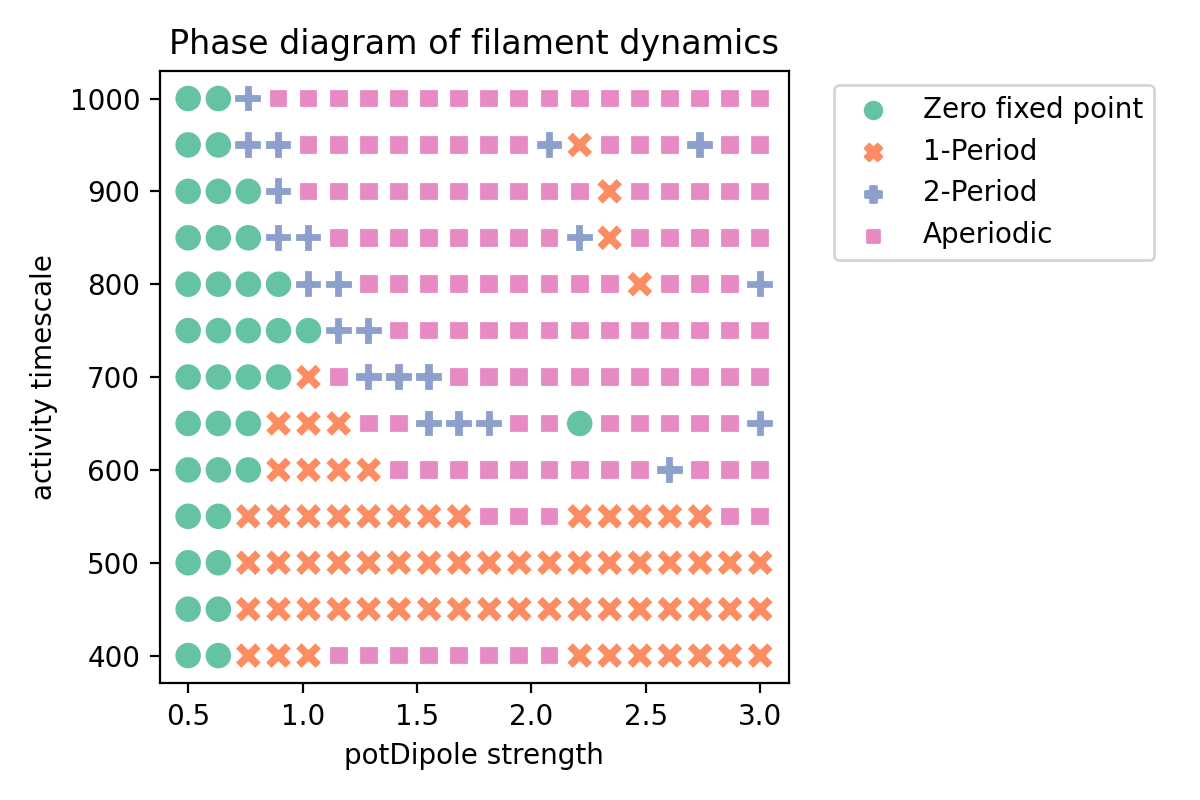

In [19]:
## Plot the predicted dynamics as a function of parameters of interest
save = True 

parameter_1 = 'potDipole strength'
parameter_2 = 'activity timescale'

title = 'Phase diagram of filament dynamics'
fig, ax = plt.subplots(figsize=(6,4))
# sns.scatterplot(x="spring constant", y=" activity time scale", hue="max unique locations", size="max unique locations",
#             sizes=(40, 400), alpha=1, palette="flare", data=df, style = "period", ax = ax,style_order = [1.0, 2.0, 4.0, 6.0, 16.0, 'aperiodic'])
sns.scatterplot(x=parameter_1, y=parameter_2, hue='Predicted dynamics',
            sizes=(400, 400), alpha=1, palette="Set2", data=df_predicted_dynamics, style = 'Predicted dynamics', 
                s= 100, hue_order = ['Zero fixed point', '1-Period', '2-Period','Aperiodic'])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title(title)
plt.tight_layout() 

if(save):

    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)

plt.show()